### Collect quality-controlled MRI and PET scans ids

Starting from quality-controlled scan lists, filter for T1-weighted MRIs and PET scans, and divide them further based on the radiopharmaceutical and the magnetic field strength:

- T1-weighted 1.5T MRI
- T1-weighted 3T MRI
- 18F-FDG PET 
- 18F-AV45 PET
- 18F-AV1451 PET
- 18F-MK6240 PET
- 18F-FBB PET
- 18F-PI2620 PET
- 18F-NAV4694 PET

In [6]:
import pandas as pd

mri_csv = "./csv/All_Subjects_Key_MRI_02Feb2026.csv"
pet_csv = "./csv/All_Subjects_Key_PET_02Feb2026.csv"

##### MRI

In [7]:
# Read csv file
df_mri = pd.read_csv(mri_csv)

# Filter for T1 weighted scans
df_mri = df_mri[ df_mri["series_type"] == "T1w"]

# Add group description (1.5T or 3T)
df_mri["group"] = "MRI-T1-3T"
df_mri.loc[ df_mri["magnetic_field_strength"] == 1.5, "group"] = "MRI-T1-1.5T"

# Keep only relevant columns 
df_mri = df_mri[ ["image_id", "image_date","subject_id", "group"]]

print(len(df_mri))
df_mri.head()

20567


,image_id,image_date,subject_id,group
1,91145,2008-02-20,037_S_1421,MRI-T1-1.5T
2,91146,2008-02-20,037_S_1421,MRI-T1-1.5T
4,118124,2008-09-17,037_S_1421,MRI-T1-1.5T
5,118125,2008-09-17,037_S_1421,MRI-T1-1.5T
7,143718,2009-05-13,037_S_1421,MRI-T1-1.5T


##### PET

In [8]:
# Read csv file
df_pet = pd.read_csv(pet_csv)

# Filter for scans explicitly described as tau, amyloid or fdg
df_pet = df_pet[ (df_pet["tau_pet"] == "Y") | 
                 (df_pet["amyloid_pet"] == "Y") | 
                 (df_pet["radiopharmaceutical"] == "18F-FDG")]

# Add modality description based on radiopharmaceutical
df_pet["group"] = "PET-" + df_pet["radiopharmaceutical"].apply(lambda x : x[4:])

# Keep only relevant columns
df_pet = df_pet[ ["image_id","image_date","subject_id","group"]]

print(len(df_pet))
df_pet.head()

9630


,image_id,image_date,subject_id,group
0,1597990,2008-09-17,037_S_1421,PET-FDG
2,1598056,2009-05-13,037_S_1421,PET-FDG
3,1598115,2010-09-24,037_S_1421,PET-FDG
5,1598209,2008-02-20,037_S_1421,PET-FDG
6,1598218,2007-09-04,037_S_1421,PET-FDG


##### Merge dataframes

In [ ]:
df_multimodal = pd.concat([df_mri, df_pet])

# Add `I` in front of id (important!)
df_multimodal["image_id"] = "I" + df_multimodal["image_id"].astype(str)

# Save
df_multimodal.to_csv("./csv/dataset_multimodal.csv", index=False)

##### Some statistics

In [15]:
import pandas as pd

df_multimodal = pd.read_csv("./csv/dataset_multimodal.csv")

In [ ]:
# Number of unique patients
len(df_multimodal["subject_id"].unique())

3289

<Axes: ylabel='Frequency'>

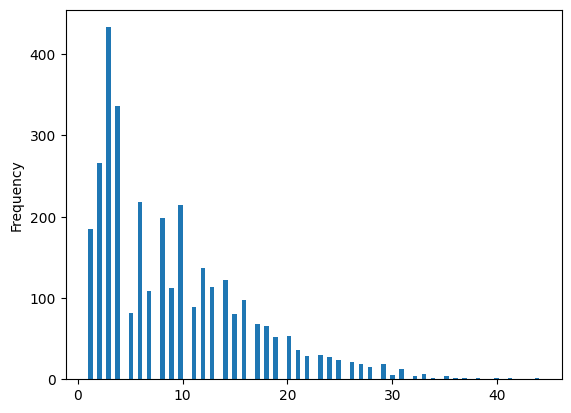

In [17]:
# Distribution of number of scans per patient
df_multimodal.groupby("subject_id")["image_id"].nunique().plot.hist(bins=100)

<Axes: ylabel='Frequency'>

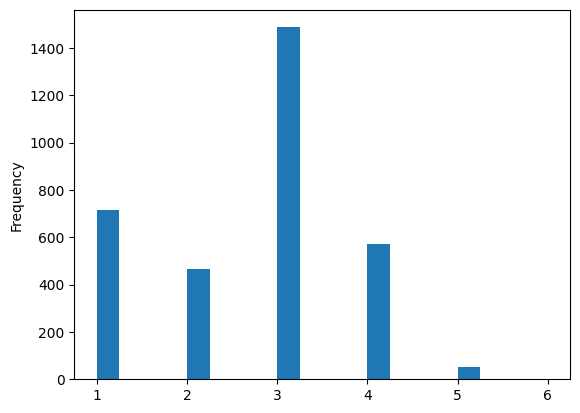

In [18]:
# Distribution of number of groups (MRI 1.5T, MRI 3T, PET with different radiopharmaceutical) per scan
df_multimodal.groupby("subject_id").nunique()["group"].plot.hist(bins=20)

##### ID copy-paste for download from ADNI website 

In [51]:
import pandas as pd 

df = pd.read_csv("./csv/dataset_multimodal.csv")

In [52]:
ids = sorted(df["image_id"].astype(str).unique())
print(len(ids))

30197


In [53]:
# Split the ids into groups of at most 4000
# so that character limit is not reached in the IDs field of the ADNI website.

count = 0
step = 4000

while count < len(ids):

    if len(ids) - count >= step:
        c_ids = ids[count:count+step]
    else:
        c_ids = ids[count:]
    
    count += len(c_ids)

    print(",".join(c_ids))


100003,100004,10002,100020,100021,10003,100033,100034,1000359,100054,100055,1000691,10007,10008,1000885,100105,100106,100107,100108,1001084,100113,100114,100129,100130,1001329,1001504,100178,100179,100197,1001975,100198,1002373,1002374,1002458,10027,10028,1002815,100292,100293,100312,100313,100329,1003294,100330,1003342,1003363,1003400,1003607,1003706,1003730,1003831,1003918,1003961,1003993,1004030,10042,10043,1004652,1004663,1004664,1004681,1004740,100497,100498,1005030,1005122,1005341,10054,10055,100571,100572,100573,1005735,1005884,1006005,1006046,100662,100663,1006805,1006806,1006825,1007384,1007600,10077,10080,1008024,100806,100807,1008180,1008408,1008421,1008547,1008726,10089,10090,1009040,1009041,1009371,1009372,1009810,1010018,1010091,1010150,1010650,1010734,1010814,1010863,1011188,1011216,1011352,101138,10116,10117,1011824,1011829,101191,101192,1011962,10126,10127,1012896,1012942,1013371,1013508,1013527,1014117,1014139,1014209,1014334,1014522,10146,1014602,10147,1015398,101558

Some images are missing in the collective search and need to be searched individually (is it a bug?)

In [ ]:
# csv with images added to the collection so far
df_coll = pd.read_csv("./csv/Multimodal_collection_2_13_2026.csv")

# ids of the collection
ids_coll = df_coll["Image Data ID"].apply( lambda s : s[1:]).unique()

# Missing ids
missing_ids = [id for id in ids if id not in ids_coll]

for id in missing_ids:
    print(f"{id}")

In [9]:
import pandas as pd

df = pd.read_csv("./csv/dataset_multimodal.csv")

In [15]:
df[ df["subject_id"] == "014_S_6831"]

,image_id,image_date,subject_id,group
18799,I1254386,2019-11-07,014_S_6831,MRI-T1-3T
18800,I1254387,2019-11-07,014_S_6831,MRI-T1-3T
19375,I10874400,2024-07-10,014_S_6831,MRI-T1-3T
29100,I10965505,2024-09-05,014_S_6831,PET-AV1451


In [18]:
sorted(df["subject_id"].unique().tolist()).index("014_S_6831")

504